# Numerical Experiments - Complexity Tests for partial random circulant matrices

In this notebook, we want to investigate the complexity of the multi-penalty framework. The complexity of the multi-penalty framework should be investigated by examining the number of tilings in a specific tiling creation. Therefore, this is exactly what we do - we will look for experiments with synthethically, randomly created data, how many different tiles in the tiling are crossed which is directly linked to how large the computational expense of a certain method is. We investigate selected examples with partial random circulant matrices.

The code that is used to perform these experiments is contained in the repositories https://github.com/soply/mpgraph for the multi-penalty framework and in https://github.com/soply/sparse_encoder_testsuite for other methods. The code is well-documented, therefore we refer for further information to these repositories. 

## 0. Import the code of the multi-penalty framework

In [3]:
import sys
import numpy as np
relative_path_to_mp_source = '../tiling_graph/' # My relative path to the multi-penalty source code
sys.path.append(relative_path_to_mp_source)
from mpgraph.run_multiple_batches import main as main_mp # Run method multi-penalty
from mpgraph.mpgraph.plot_tools.multiple_methods_multiple_batches import n_supports_at_largest_vs_sparsity_level
from mpgraph.mpgraph.plot_tools.multiple_methods_multiple_batches import n_supports_vs_tiling_size

# Defining the tiling creation options for multi-penalty LARS and multi-penalty LASSO methods
tiling_options_LARS = {
    'verbose': 0,
    'mode': 'LARS',
    'print_summary': False
}
tiling_options_LASSO = {
    'verbose': 0,
    'mode': 'LASSO',
    'print_summary': False
}

## Partial random circulant matrices (number of supports at last sparsity level)

### Case 1.1: #measurements << #features: 
Here, we consider experiments where the number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases.

In [4]:
# Specifying a problem
identifier_mms = 'prcm_rm_meas_much_smaller_feat_1' # For saving the files to some folder
random_seeds = [2074365993, 3608845689, 882858127, 4250122149, 2013921082, 2530214045, 2163201462, 3238461939, 1176474622, 
        1299165341, 318653059, 4109633665, 3784842373, 576600661, 2951085025, 747082525]
problem_mms = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 150, # = m 
    'n_features': 500, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_mms_mpsr = dict(problem_mms)
# Update with multi-penalty framework properties
problem_mms_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms], problem_mms_mpsr)

# LASSO-version
# Copy old dict
problem_mms_mpsr = dict(problem_mms)
# Update with multi-penalty framework properties
problem_mms_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms], problem_mms_mpsr)

#### Results

/Users/timoklock/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


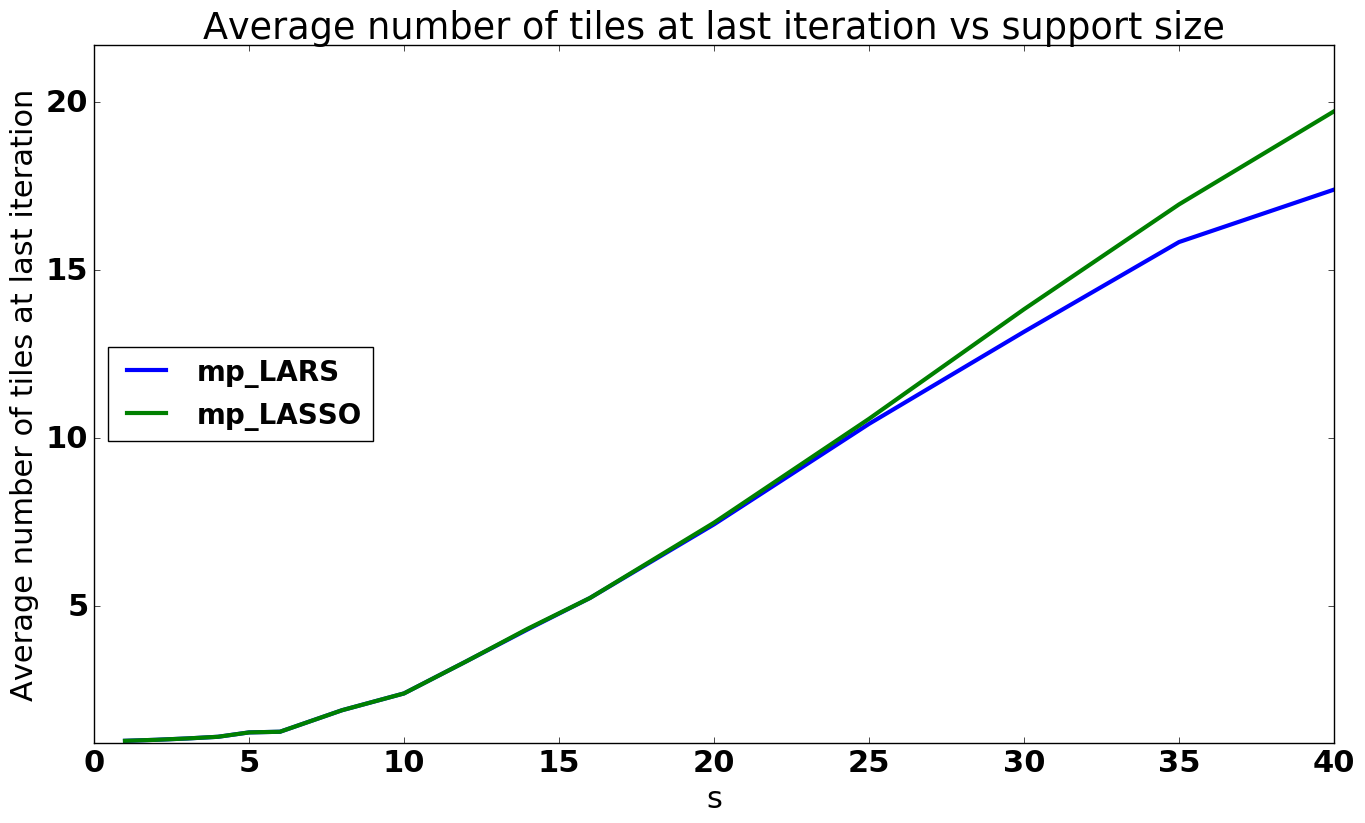

In [5]:
n_supports_at_largest_vs_sparsity_level('results_multiple_batches', identifier_mms, ['mp_LARS', 'mp_LASSO'], 
                                        xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'center left',
                                        legend_cols = 1)

### Case 1.2 #measurements << #features
Here, we consider experiments where the number of number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases. Additionally, we apply some measurement noise in this experiment.

In [6]:
# Specifying a problem
identifier_mms2 = 'prcm_rm_meas_much_smaller_feat_2' # For saving the files to some folder
random_seeds = [318651233, 4266868505, 2862097710, 413577336, 3099426747, 1087932463, 143461065, 2935434254, 3050947428, 
        1001518416, 2553363172, 3608867414, 1790903534, 18552655, 335443164, 989458820]
problem_mms2 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 150, # = m 
    'n_features': 500, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.15, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework


In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_mms2_mpsr = dict(problem_mms2)
# Update with multi-penalty framework properties
problem_mms2_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms2], problem_mms2_mpsr)

# LASSO-version
# Copy old dict
problem_mms2_mpsr = dict(problem_mms2)
# Update with multi-penalty framework properties
problem_mms2_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms2], problem_mms2_mpsr)

#### Results

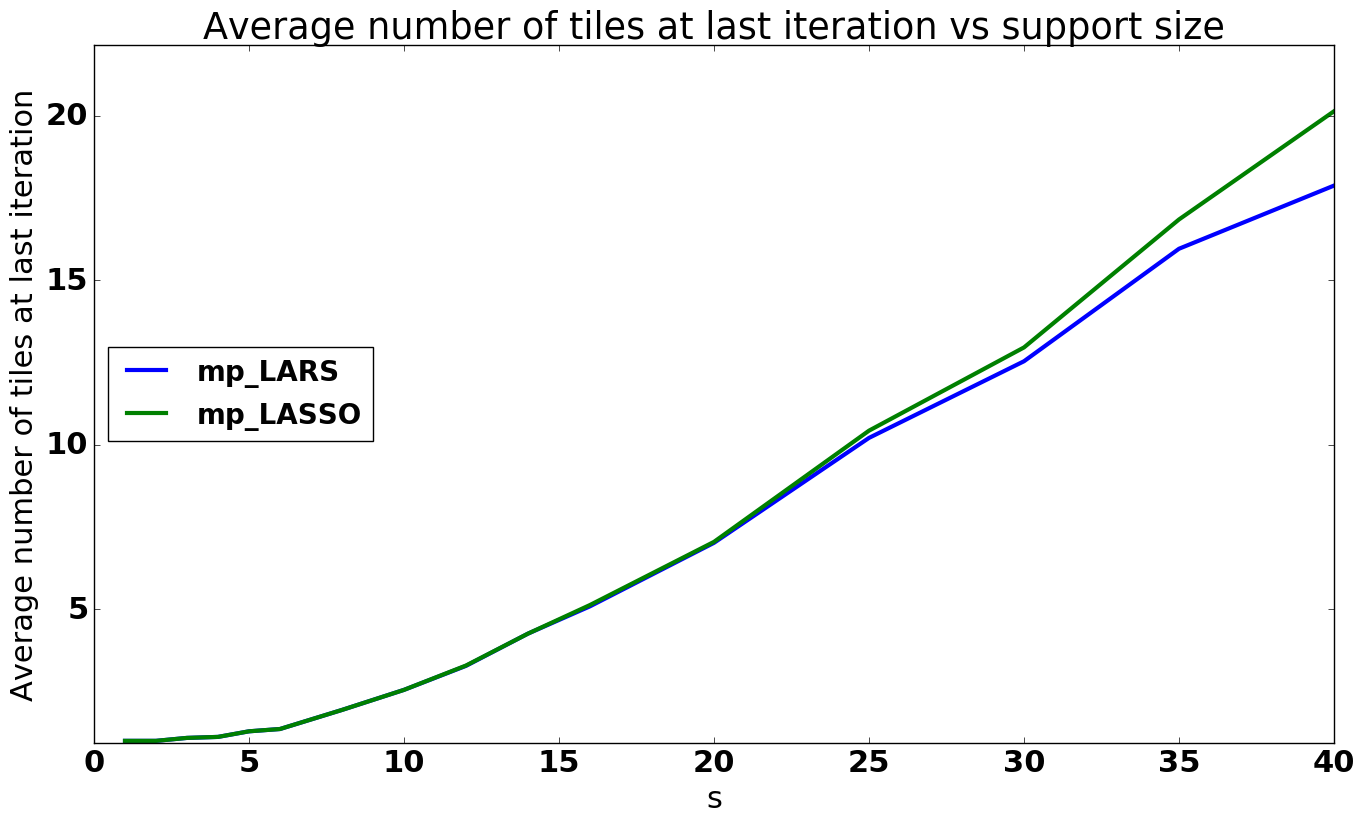

In [7]:
n_supports_at_largest_vs_sparsity_level('results_multiple_batches', identifier_mms2, ['mp_LARS', 'mp_LASSO'], 
                                        xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'center left',
                                        legend_cols = 1)

### Case 1.3: #measurements << #features (high dim)
Here, we consider experiments where the number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases.

In [8]:
# Specifying a problem
identifier_hd = 'prcm_rm_meas_much_smaller_feat_3' # For saving the files to some folder
random_seeds = [3107401650, 3236886930, 1595287100, 4263294224, 1058345730, 1861301578, 3913158634, 3951764974, 822410826, 
        3412174722, 1764859025, 781943365, 1574535126, 4275621399, 1718193416, 1322439636]
problem_hd = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 350, # = m 
    'n_features': 1000, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_hd_mpsr = dict(problem_hd)
# Update with multi-penalty framework properties
problem_hd_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_hd], problem_hd_mpsr)

# LASSO-version
# Copy old dict
problem_hd_mpsr = dict(problem_hd)
# Update with multi-penalty framework properties
problem_hd_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_hd], problem_hd_mpsr)

#### Results

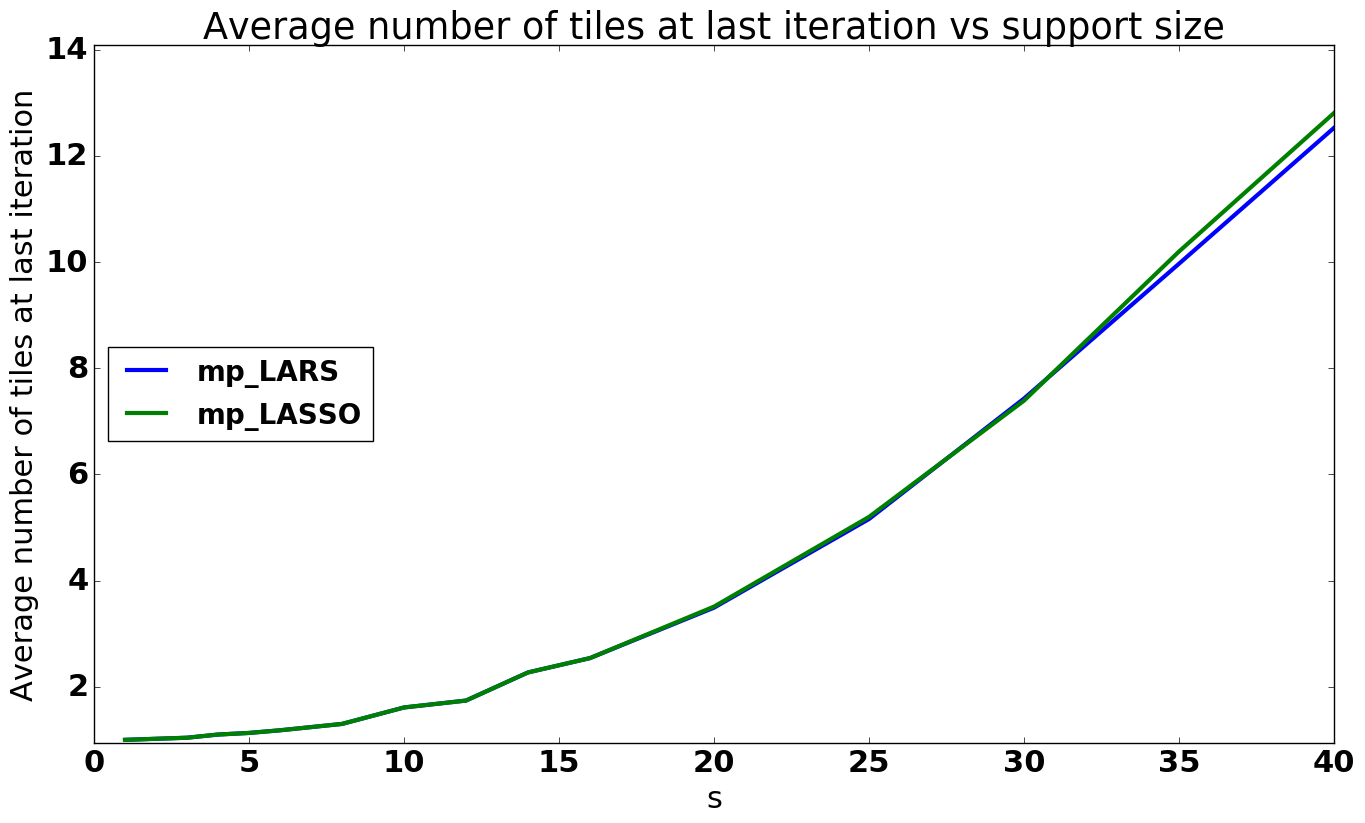

In [9]:
n_supports_at_largest_vs_sparsity_level('results_multiple_batches', identifier_hd, ['mp_LARS', 'mp_LASSO'], 
                                        xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'center left',
                                        legend_cols = 1)

## Gaussian matrices (number of tiles as curve over support size, throughout experiment)

### Case 2.1: Dependency on signal noise, moderate $m$, $n$
Here, we consider experiments with $m = 150$, $n = 400$ and $s = |I^\dagger| = 10$ and varying signal noise to see the influence of the signal noise on the different methods.

In [10]:
# Specifying a problem
identifier_signal_noise1 = 'prcm_rm_signal_noise1' # For saving the files to some folder
random_seeds = [3925681922, 1925922750,  690608730, 4136805350, 1174167523,
        894059698,  703837878, 2008556168, 2265107943,  224641010,
       3449664981,  902617783, 4263995371, 2062887822]
problem_signal_noise1 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 100, # = m 
    'n_features': 500, # = n
    'sparsity_level': 5, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise1_mpsr = dict(problem_signal_noise1)
# Update with multi-penalty framework properties
problem_signal_noise1_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise1], problem_signal_noise1_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise1_mpsr = dict(problem_signal_noise1)
# Update with multi-penalty framework properties
problem_signal_noise1_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise1], problem_signal_noise1_mpsr)

#### Results

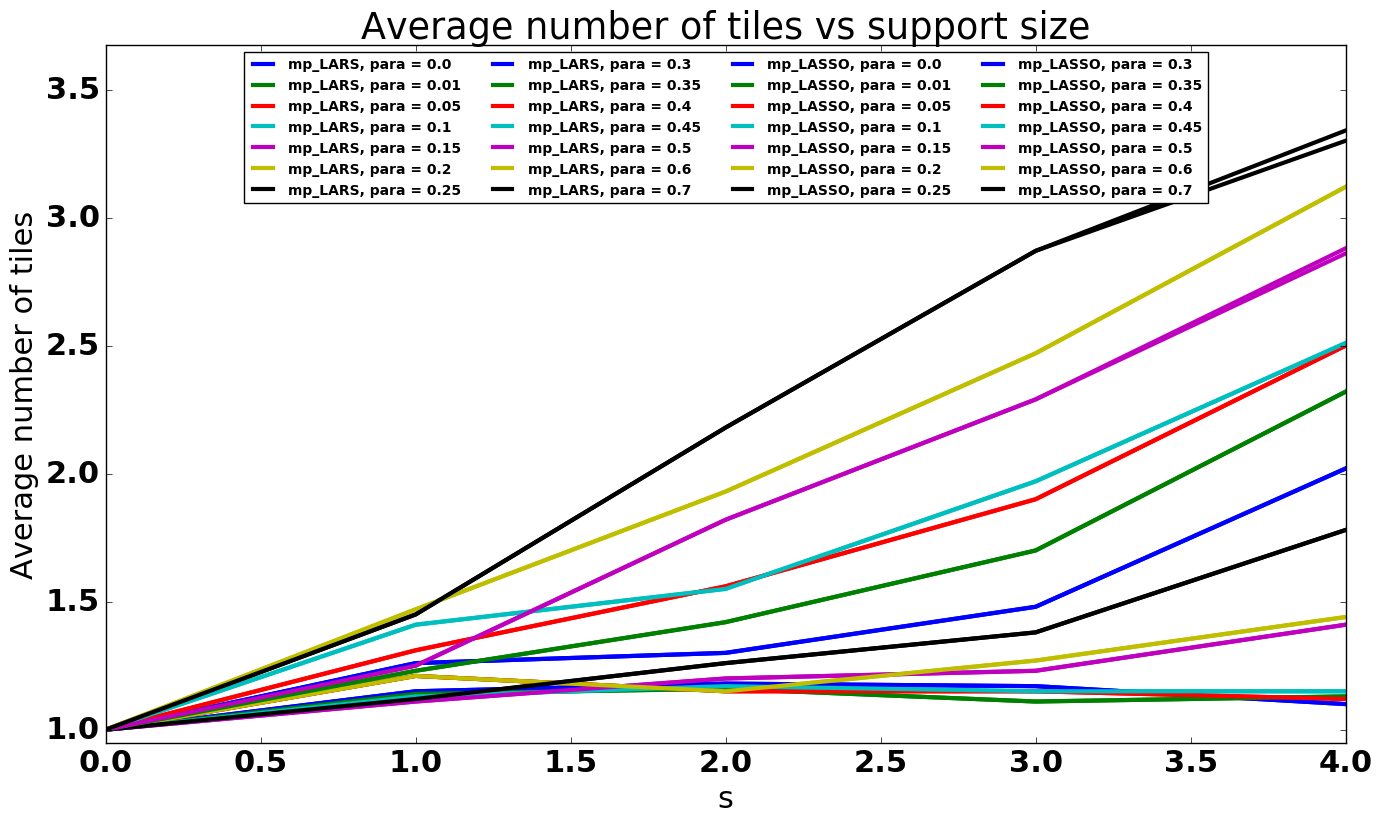

In [11]:
n_supports_vs_tiling_size('results_multiple_batches', identifier_signal_noise1, ['mp_LARS', 'mp_LASSO'], 
                          varying_parameter = 'noise_lev_signal',
                          xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'upper center',
                          legend_cols = 4, legend_fontsize = 10.0)

### Case 2.2: Dependency on signal noise, larger $m$, $n$
Here, we consider experiments with $m = 250$, $n = 900$ and $s = |I^\dagger| = 10$ and varying signal noise to see the influence of the signal noise on the different methods.

In [12]:
# Specifying a problem
identifier_signal_noise2 = 'prcm_rm_signal_noise2' # For saving the files to some folder
random_seeds = [3445792111, 3152270580,  631516397,  865032037, 4221192006,
       3849748425, 3781882941, 3093467256, 1642997036, 2996623077,
       1746333050, 2926221320, 1203597124, 2274899605]
problem_signal_noise2 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 350, # = m 
    'n_features': 1000, # = n
    'sparsity_level': 7, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise2_mpsr = dict(problem_signal_noise2)
# Update with multi-penalty framework properties
problem_signal_noise2_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise2], problem_signal_noise2_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise2_mpsr = dict(problem_signal_noise2)
# Update with multi-penalty framework properties
problem_signal_noise2_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise2], problem_signal_noise2_mpsr)

#### Results

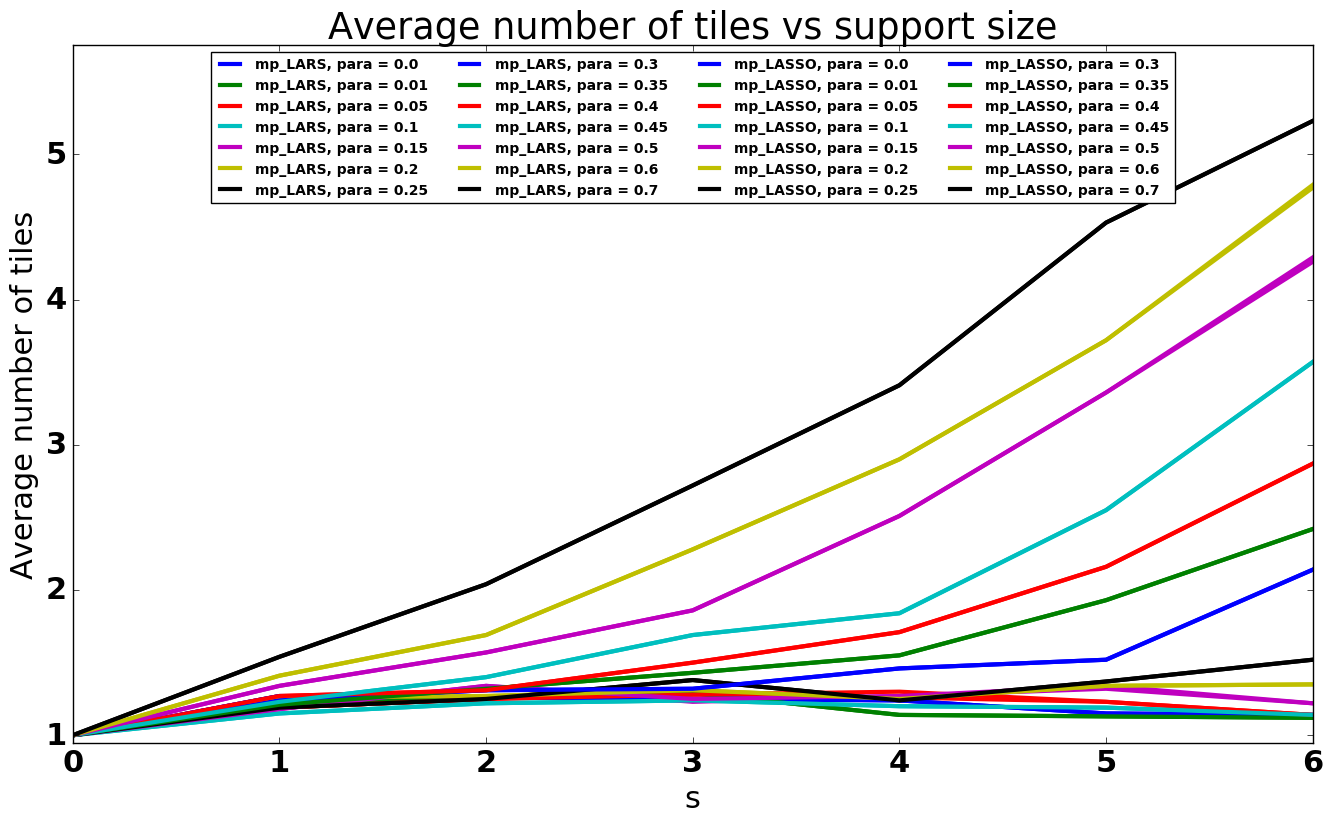

In [13]:
n_supports_vs_tiling_size('results_multiple_batches', identifier_signal_noise2, ['mp_LARS', 'mp_LASSO'], 
                          varying_parameter = 'noise_lev_signal',
                          xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'upper center',
                          legend_cols = 4, legend_fontsize = 10.0)

### Case 2.3: Dependency on signal noise for small $m$, large $n$ and small $s$ 
Here, we consider experiments with $m = 100$, $n = 1000$ and $s = |I^\dagger| = 5$ and varying signal noise to see the influence of the signal noise on the different methods.

In [15]:
# Specifying a problem
identifier_signal_noise3 = 'prcm_rm_signal_noise3' # For saving the files to some folder
random_seeds = [1729830023, 1916060518, 1363177418, 1103227466,  728973815,
       2561211021, 2099010721, 2535889269, 2841930523, 1973143070,
        114379252, 1141759307, 1992878642, 3859041000]
problem_signal_noise3 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 500, # = m 
    'n_features': 2500, # = n
    'sparsity_level': 9, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise3_mpsr = dict(problem_signal_noise3)
# Update with multi-penalty framework properties
problem_signal_noise3_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 5}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise3], problem_signal_noise3_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise3_mpsr = dict(problem_signal_noise3)
# Update with multi-penalty framework properties
problem_signal_noise3_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 5}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise3], problem_signal_noise3_mpsr)

#### Results

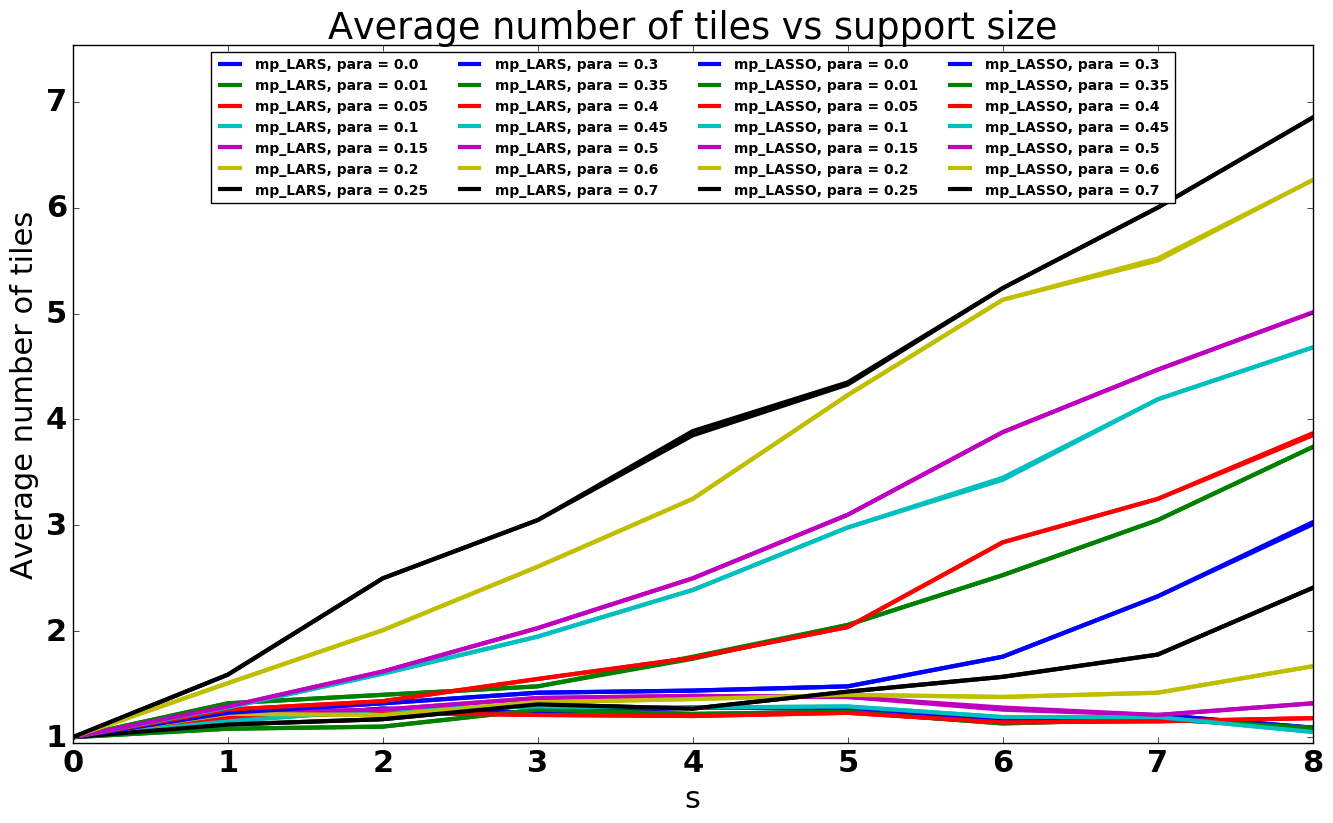

In [16]:
n_supports_vs_tiling_size('results_multiple_batches', identifier_signal_noise3, ['mp_LARS', 'mp_LASSO'], 
                          varying_parameter = 'noise_lev_signal',
                          xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'upper center',
                          legend_cols = 4, legend_fontsize = 10.0)

### Case 2.4:  Dependency signal entry gap for $m$, large $n$ and small $s$ 
Here, we consider experiments with $m = 100$, $n = 500$ and $s = |I^\dagger| = 10$ and varying signal gap, ie. we keep the signal noise and the smallest entry at $0.2$ and $1.5$ and vary the largest signal entry.

In [17]:
# Specifying a problem
identifier_signal_gap1 = 'prcm_rm_signal_gap1' # For saving the files to some folder
random_seeds = [ 811493389, 4279791322, 2405488816, 1356002752, 1354561538,
       1157940983, 3388634667, 1353668795,   44371308, 2190539692,
       2087811664, 2460754552,  590402847,  978808882]
problem_signal_gap1 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 250, # = m 
    'n_features': 800, # = n
    'sparsity_level': 9, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': [1.6, 1.8, 2.0, 2.2, 2.5, 3.0, 4.0, 5.0, 7.5, 10.0, 13.5, 17.0, 20.0, 30.0], # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [ ]:
%%capture
# LARS-version
# Copy old dict
problem_signal_gap1_mpsr = dict(problem_signal_gap1)
# Update with multi-penalty framework properties
problem_signal_gap1_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_gap1], problem_signal_gap1_mpsr)

# LASSO-version
# Copy old dict
problem_signal_gap1_mpsr = dict(problem_signal_gap1)
# Update with multi-penalty framework properties
problem_signal_gap1_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 10}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_gap1], problem_signal_gap1_mpsr)

#### Results

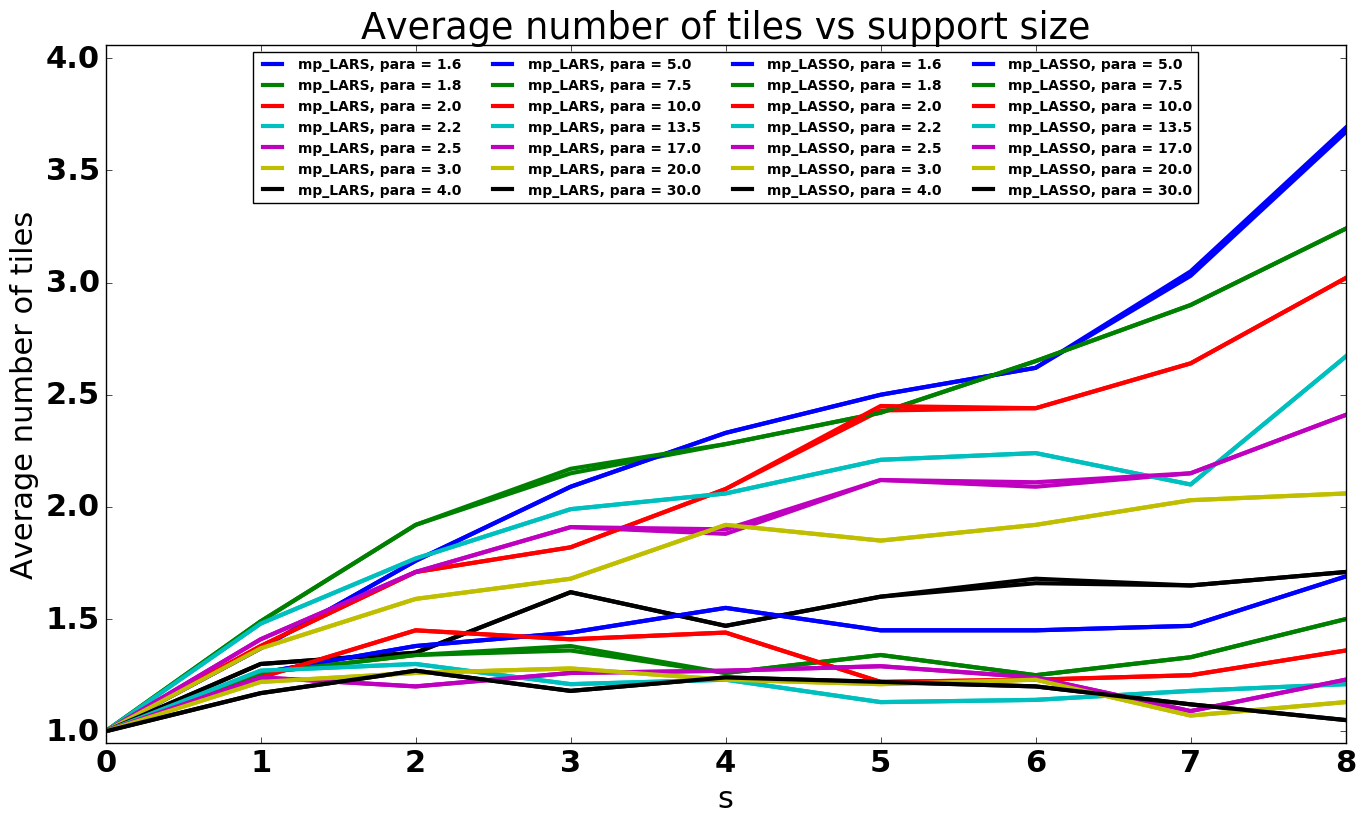

In [18]:
n_supports_vs_tiling_size('results_multiple_batches', identifier_signal_gap1, ['mp_LARS', 'mp_LASSO'], 
                          varying_parameter = 'largest_signal',
                          xlabel='s', save_as = 'gaussian_success_vs_s_1', leg_loc = 'upper center',
                          legend_cols = 4, legend_fontsize = 10.0)